In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [148]:
# import semi_production_and_use.xlsx as a dataframe
df = pd.read_excel('semi_production_and_use.xlsx', sheet_name='production', header=3)
df = df.drop(df.index[-4:])

# drop % Regional Haul and % Long Haul
df = df.drop(['% Regional Haul', '% Long Haul'], axis=1)

# convert year column from object to int
df['Year'] = df['Year'].astype(int)

# rename Class 8 total to Produced
df = df.rename(columns={'Class 8 total': 'Produced'})

df

,Year,Class 8 Tractor Regional Haul,Class 8 Tractor Long Haul,Produced
0,1999,36910.0,180205.0,217115.0
1,2000,35211.0,105632.0,140843.0
2,2001,25124.0,48771.0,73895.0
3,2002,39794.0,62241.0,102035.0
4,2003,45652.0,60516.0,106168.0
5,2004,77035.0,77035.0,154070.0
6,2005,77893.0,112091.0,189984.0
7,2006,90008.0,114555.0,204563.0
8,2007,36878.0,48884.0,85762.0
9,2008,35505.0,57930.0,93435.0


In [152]:
# add new column called Produced Past 12 Years that sums the previous 12 rows
df['Produced Past 12 Years'] = df['Produced'].rolling(12).sum()
df['Long Haul Past 12 Years'] = df['Class 8 Tractor Long Haul'].rolling(12).sum()
df['Regional Past 12 Years'] = df['Class 8 Tractor Regional Haul'].rolling(12).sum()
df

,Year,Class 8 Tractor Regional Haul,Class 8 Tractor Long Haul,Produced,Produced Past 12 Years,Long Haul Past 12 Years,Regional Past 12 Years
0,1999,36910.0,180205.0,217115.0,NaN,NaN,NaN
1,2000,35211.0,105632.0,140843.0,NaN,NaN,NaN
2,2001,25124.0,48771.0,73895.0,NaN,NaN,NaN
3,2002,39794.0,62241.0,102035.0,NaN,NaN,NaN
4,2003,45652.0,60516.0,106168.0,NaN,NaN,NaN
5,2004,77035.0,77035.0,154070.0,NaN,NaN,NaN
6,2005,77893.0,112091.0,189984.0,NaN,NaN,NaN
7,2006,90008.0,114555.0,204563.0,NaN,NaN,NaN
8,2007,36878.0,48884.0,85762.0,NaN,NaN,NaN
9,2008,35505.0,57930.0,93435.0,NaN,NaN,NaN


Text(0.5, 0, 'Year')

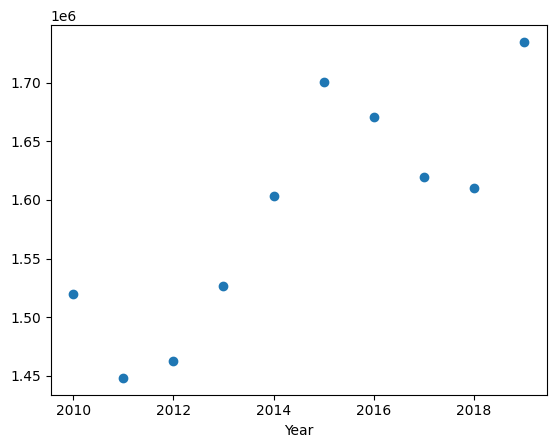

In [145]:
# scatter plot Produced Past 12 Years against Year from index 11 onward
plt.scatter(df['Year'][11:], df['Produced Past 12 Years'][11:])
plt.xlabel('Year')